# Aviation Industry Analysis

#### Elina Rankova

[Image Placeholder]

## 1. Business Problem and Understanding

**Stakeholders:** CEO, Head of Operations, Head of Aviation (brand new department)

Our company is expanding into airplane aviation to diversify its portfolio. We aim to evaluate which aircrafts and aircraft specifics pose the lowest risk as we venture into a brand new industry. 

**Some preliminary questions include:**

- *What type of aircraft makes the most sense to purchase first?*
- *Are there aircraft specifics such as number of engines, or engine type that contribute to risk?*
- *Are there special safety training conditions we should consider for training*
- *Have there been improvements in aviation technology and regulation helping us determine which data is valid?*

For analysis, we are using data from the <a href = "https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses">Aviation Accident Database & Synopses</a>, up to 2023.

Each record represents an accident event and includes much information about aircraft specifics as well as passenger injury details and information about accident events.

**The goal: evaluate which type of airplane makes the most sense purchase as we enter an industry we have not explored before.**

We want to find out which statistics about aviation accident reports provide valuable information about which aircraft poses least risk.

In [1]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

# Ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Load in data

# Had to specify encoding 'latin-1' for file to load
# Setting low_memory=False in the read_csv function will force pandas to read the entire file at once, 
# which can help with inferring the correct data types. 

ad = pd.read_csv('Data/AviationData.csv', encoding='latin-1', low_memory=False)
ad.head()

,Unnamed: 0.1,Unnamed: 0,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Event.Year
0,0,0.0,20001218X45444,Accident,SEA87LA080,1948-10-24,"moose creek, id",United States,NaN,NaN,...,NaN,2,0,0,0,UNKNOWN,Cruise,Probable Cause,NaN,1948
1,1,1.0,20001218X45447,Accident,LAX94LA336,1962-07-19,"bridgeport, ca",United States,NaN,NaN,...,NaN,4,0,0,0,UNKNOWN,Unknown,Probable Cause,19-09-1996,1962
2,2,3.0,20001218X45448,Accident,LAX96LA321,1977-06-19,"eureka, ca",United States,NaN,NaN,...,NaN,2,0,0,0,IMC,Cruise,Probable Cause,12-09-2000,1977
3,3,6.0,20001218X45446,Accident,CHI81LA106,1981-08-01,"cotton, mn",United States,NaN,NaN,...,NaN,4,0,0,0,IMC,Unknown,Probable Cause,06-11-2001,1981
4,4,7.0,20020909X01562,Accident,SEA82DA022,1982-01-01,"pullman, wa",United States,NaN,NaN,...,NaN,0,0,0,2,VMC,Takeoff,Probable Cause,01-01-1982,1982


In [3]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73047 entries, 0 to 73046
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0.1            73047 non-null  int64  
 1   Unnamed: 0              73047 non-null  float64
 2   Event.Id                73047 non-null  object 
 3   Investigation.Type      73047 non-null  object 
 4   Accident.Number         73047 non-null  object 
 5   Event.Date              73047 non-null  object 
 6   Location                73047 non-null  object 
 7   Country                 73047 non-null  object 
 8   Latitude                22375 non-null  object 
 9   Longitude               22376 non-null  object 
 10  Airport.Code            41401 non-null  object 
 11  Airport.Name            43684 non-null  object 
 12  Injury.Severity         73047 non-null  object 
 13  Aircraft.damage         73047 non-null  object 
 14  Aircraft.Category       73047 non-null

In [4]:
ad.describe()

,Unnamed: 0.1,Unnamed: 0,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Year
count,73047.000000,73047.000000,69091.000000,73047.000000,73047.000000,73047.000000,73047.000000,73047.000000
mean,36672.865059,41762.526798,1.143116,0.510685,0.246444,0.303640,4.840651,1998.146837
std,21308.985691,27173.237937,0.440182,4.235008,1.478230,1.549842,26.160360,12.661842
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1948.000000
25%,18261.500000,18496.500000,1.000000,0.000000,0.000000,0.000000,0.000000,1987.000000
50%,36523.000000,37029.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1995.000000
75%,54813.500000,69727.500000,1.000000,0.000000,0.000000,0.000000,2.000000,2011.000000
max,74498.000000,88888.000000,8.000000,295.000000,161.000000,171.000000,576.000000,2022.000000


We will have to do some cleaning since there seems to be a good amount of missingness. There are date columns that might also need to be converted to a non-object type.

**Additional observations:**
- 88888 rows and 31 columns
- 5 floats and 26 objects
- Columns may will need capitalization adjusted
- There are some outliers that may need to be addressed

## 2. Data Exploration & Preparation 

The following process reflects preliminary data cleaning to adjust the dataframe to a working condition for the subsequent statistical analysis and visualization exploration.

Handling the missingness will be a large part of data cleaning for this dataset.

In [5]:
# Assess the missingness

ad.isna().sum()

Unnamed: 0.1                  0
Unnamed: 0                    0
Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Latitude                  50672
Longitude                 50671
Airport.Code              31646
Airport.Name              29363
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category             0
Registration.Number         225
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines          3956
Engine.Type                   0
FAR.Description           45964
Schedule                  62811
Purpose.of.flight             0
Air.carrier               57491
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Report.S

In [6]:
# Assess missingness by percentage

ad.isna().sum()/len(ad)*100

Unnamed: 0.1               0.000000
Unnamed: 0                 0.000000
Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Latitude                  69.369036
Longitude                 69.367667
Airport.Code              43.322792
Airport.Name              40.197407
Injury.Severity            0.000000
Aircraft.damage            0.000000
Aircraft.Category          0.000000
Registration.Number        0.308021
Make                       0.000000
Model                      0.000000
Amateur.Built              0.000000
Number.of.Engines          5.415691
Engine.Type                0.000000
FAR.Description           62.923871
Schedule                  85.987104
Purpose.of.flight          0.000000
Air.carrier               78.704122
Total.Fatal.Injuries       0.000000
Total.Serious.Injuries     0.000000
Total.Minor.Injuries       0

#### Exploration of Column Values

To understand how to handle the missingness as well as understand which imputations may be necessary for analysis, we must explore relevant column.

Some columns will be dropped and must be noted as such.

<br>**Injury Severity:** Adjust capitalization and combine all fatal cases into one.

In [7]:
ad['Injury.Severity'].value_counts()

non-fatal    56490
fatal        14610
incident      1548
minor          218
serious        173
unknown          8
Name: Injury.Severity, dtype: int64

<br>**Aircraft Damage:** Can adjust capitalization, imputate NA to 'unknown', then redistribute unknowns based on probability.

In [8]:
ad['Aircraft.damage'].value_counts()

substantial    53138
destroyed      15600
unknown         2234
minor           2075
Name: Aircraft.damage, dtype: int64

<br>**Make:** Lowercase all letters.

In [9]:
ad['Make'].value_counts()

cessna                 22879
piper                  12623
beech                   4460
bell                    2157
boeing                  1798
                       ...  
pacheco                    1
sirocco flying club        1
trickle                    1
richardson                 1
royse ralph l              1
Name: Make, Length: 6316, dtype: int64

<br>**Registration Number:** This column isn't needed, we can drop it.

In [10]:
ad['Registration.Number'].value_counts()

NONE      299
UNREG     120
UNK        12
USAF        9
N20752      8
         ... 
N8074A      1
N8126W      1
N6369W      1
N17577      1
N9026P      1
Name: Registration.Number, Length: 66842, dtype: int64

<br>**Number of Engines:** Missing ~7% of data. Distribute na values based on probability distribution of existing values.

In [11]:
ad['Number.of.Engines'].value_counts(normalize=True)

1.0    0.846246
2.0    0.129177
0.0    0.013489
3.0    0.006036
4.0    0.004993
8.0    0.000043
6.0    0.000014
Name: Number.of.Engines, dtype: float64

<br> **Engine Type:** Adjust capitalization. Missing ~8% of data; we can combine unknown & UNK and then redistribute missing values based on probability.

**Create probability dispersion & adjust visualization**

In [12]:
ad['Engine.Type'].value_counts(normalize=True)

reciprocating      0.801607
unknown            0.090750
turbo shaft        0.038496
turbo prop         0.036237
turbo fan          0.024929
turbo jet          0.007529
none               0.000287
electric           0.000110
lr                 0.000027
hybrid rocket      0.000014
geared turbofan    0.000014
Name: Engine.Type, dtype: float64

<br>**FAR Description:** Too many na values and not enough significance for analysis, we can drop this column

In [13]:
ad['FAR.Description'].value_counts()

091                               18193
Part 91: General Aviation          3110
NUSN                               1456
137                                1010
135                                 738
NUSC                                624
121                                 590
UNK                                 293
Part 137: Agricultural              261
PUBU                                252
Part 135: Air Taxi & Commuter       186
129                                 136
133                                 107
Part 121: Air Carrier                52
Part 133: Rotorcraft Ext. Load       26
091K                                 14
Unknown                               6
ARMF                                  5
125                                   5
107                                   4
Part 129: Foreign                     4
Part 125: 20+ Pax,6000+ lbs           3
Public Use                            2
103                                   2
Non-U.S., Commercial                  1


<br> **Schedule:** Not relevant to analysis, we can drop

In [14]:
ad['Schedule'].value_counts()

UNK     4016
NSCH    3487
SCHD    2733
Name: Schedule, dtype: int64

<br> **Purpose of Flight:** Can imputate and na to 'Unknown' & adjust capitalization.

In [15]:
ad['Purpose.of.flight'].value_counts

<bound method IndexOpsMixin.value_counts of 0             personal
1             personal
2             personal
3             personal
4             personal
             ...      
73042    instructional
73043          unknown
73044         personal
73045         personal
73046         personal
Name: Purpose.of.flight, Length: 73047, dtype: object>

<br> **Air Carrier:** Too much missing data and not enough analytical significance, we can drop this column.

In [16]:
ad['Air.carrier'].value_counts()

Pilot                      258
United Airlines             73
American Airlines           73
Delta Air Lines             45
SOUTHWEST AIRLINES CO       41
                          ... 
Glen Van Zee                 1
Apollo Aviation Inc          1
Panorama Flight Service      1
JOHNSON TERRY G              1
GERBER RICHARD E             1
Name: Air.carrier, Length: 12953, dtype: int64

<br> **Total Uninjured:** Drop na, may help understand which aircraft is safest

In [17]:
ad['Total.Uninjured'].value_counts()

0      28714
1      21118
2      13274
3       3608
4       2271
       ...  
399        1
322        1
265        1
339        1
368        1
Name: Total.Uninjured, Length: 363, dtype: int64

<br> **Weather Condition:** Adjust capitalization and combine; unk & unknown

**Definition:** Visual meteorological conditions (VMC) is an aviation flight category 
in which visual flight rules (VFR) flight is permitted—that is, conditions in which 
pilots have sufficient visibility to fly the aircraft maintaining visual separation 
from terrain and other aircraft. 

In aviation, instrument meteorological conditions (IMC) are weather conditions that 
require pilots to fly primarily by reference to flight instruments. Typically, this 
means flying in cloud or poor weather, where little or nothing can be seen or recognised 
when looking out of the window. 

**Source:** <a href = https://en.wikipedia.org/wiki/Visual_meteorological_conditions>Wikipedia</a>

In [18]:
ad['Weather.Condition'].value_counts()

VMC        64107
IMC         4942
UNKNOWN     3998
Name: Weather.Condition, dtype: int64

<br> **Broad Phase of Flight:** Combine 'unknown' & 'other'.

In [19]:
ad['Broad.phase.of.flight'].value_counts(normalize=True)

Unknown        0.346462
Landing        0.160431
Takeoff        0.135611
Cruise         0.112174
Maneuvering    0.088162
Approach       0.070297
Climb          0.022246
Taxi           0.020521
Descent        0.020288
Go-around      0.014511
Standing       0.009295
Name: Broad.phase.of.flight, dtype: float64

<br> **Report Status:** So much mixed information types, can't know what the numbers mean. Drop this column.

In [20]:
ad['Report.Status'].value_counts(normalize=True)

Probable Cause                                                                                                                                                                                                                                                0.714799
Foreign                                                                                                                                                                                                                                                       0.009422
<br /><br />                                                                                                                                                                                                                                                  0.002145
Factual                                                                                                                                                                                                            

<br> **Publication Date:** # Since we have event date and there are, so many values missing we are dropping the column.

In [21]:
ad['Publication.Date'].value_counts(normalize=True)

25-09-2020    0.271666
26-09-2020    0.026671
03-11-2020    0.016721
31-03-1993    0.007693
15-02-2001    0.006428
                ...   
03-12-2004    0.000017
20-04-1998    0.000017
11-02-2002    0.000017
15-05-1998    0.000017
29-12-2022    0.000017
Name: Publication.Date, Length: 2032, dtype: float64

### Basic Data Cleaning

The next step in cleaning is dropping or accounting missingness where appropriate, adjusting data types, capitalization, and other minor adjustments to the database.

#### Drop missing values

In [22]:
# Dropping rows of columns with few missing data
# Will not impact overall analysis

ad.dropna(inplace=True, 
          subset=['Location', 'Country', 'Make', 'Model',
                  'Injury.Severity','Total.Uninjured','Total.Fatal.Injuries',
                  'Total.Serious.Injuries','Total.Minor.Injuries'])
ad.isna().sum()

Unnamed: 0.1                  0
Unnamed: 0                    0
Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Latitude                  50672
Longitude                 50671
Airport.Code              31646
Airport.Name              29363
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category             0
Registration.Number         225
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines          3956
Engine.Type                   0
FAR.Description           45964
Schedule                  62811
Purpose.of.flight             0
Air.carrier               57491
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Report.S

#### Create `Event.Year` Column

In [23]:
# Create event year column

ad['Event.Year'] = ad['Event.Date'].str[:4]
ad['Event.Year'].min()

'1948'

#### Create `Injuries` Column

In [53]:
# Create injuries column

ad['Injuries'] = ad['Total.Fatal.Injuries']+ad['Total.Serious.Injuries']
ad['Injuries'].value_counts()

0      48857
1      13138
2       6803
3       1861
4       1292
       ...  
122        1
256        1
144        1
63         1
97         1
Name: Injuries, Length: 99, dtype: int64

#### Adjust Data Types

In [24]:
# Convert Injury columns to int

ad['Event.Year']= ad['Event.Year'].astype(int)
ad['Total.Fatal.Injuries']= ad['Total.Fatal.Injuries'].astype(int)
ad['Total.Serious.Injuries']= ad['Total.Serious.Injuries'].astype(int)
ad['Total.Minor.Injuries']= ad['Total.Minor.Injuries'].astype(int)
ad['Total.Uninjured']= ad['Total.Uninjured'].astype(int)
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73047 entries, 0 to 73046
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0.1            73047 non-null  int64  
 1   Unnamed: 0              73047 non-null  float64
 2   Event.Id                73047 non-null  object 
 3   Investigation.Type      73047 non-null  object 
 4   Accident.Number         73047 non-null  object 
 5   Event.Date              73047 non-null  object 
 6   Location                73047 non-null  object 
 7   Country                 73047 non-null  object 
 8   Latitude                22375 non-null  object 
 9   Longitude               22376 non-null  object 
 10  Airport.Code            41401 non-null  object 
 11  Airport.Name            43684 non-null  object 
 12  Injury.Severity         73047 non-null  object 
 13  Aircraft.damage         73047 non-null  object 
 14  Aircraft.Category       73047 non-null

#### Adjust Capitalization

In [25]:
# Create function to lowercase selected columns

def lowercase(df):
    df = df.apply(lambda x: x.str.lower())
    return df

# Imutate on database to lowercase all relevant columns

ad[['Purpose.of.flight','Make','Aircraft.Category','Engine.Type',
    'Location','Injury.Severity','Aircraft.damage']] \
= lowercase(ad[['Purpose.of.flight','Make','Aircraft.Category','Engine.Type',
                'Location','Injury.Severity','Aircraft.damage']])
ad['Engine.Type'].value_counts(normalize=True)

reciprocating      0.801607
unknown            0.090750
turbo shaft        0.038496
turbo prop         0.036237
turbo fan          0.024929
turbo jet          0.007529
none               0.000287
electric           0.000110
lr                 0.000027
hybrid rocket      0.000014
geared turbofan    0.000014
Name: Engine.Type, dtype: float64

In [26]:
# Create function to uppercase selected columns

def uppercase(df):
    df = df.apply(lambda x: x.str.upper())
    return df

ad[['Weather.Condition']] = uppercase(ad[['Weather.Condition']])
ad['Weather.Condition'].value_counts(normalize=True)

VMC        0.877613
IMC        0.067655
UNKNOWN    0.054732
Name: Weather.Condition, dtype: float64

#### Addressing Unknown Category

In [27]:
# Combine all versions of 'unknown' into one 'unknown'

ad.loc[ad['Engine.Type'] == 'unk', ['Engine.Type']] = 'unknown'
ad.loc[ad['Injury.Severity'] == 'unavailable', ['Injury.Severity']] = 'unknown'
ad.loc[ad['Weather.Condition'] == 'UNK', ['Weather.Condition']] = 'unknown'
ad.loc[ad['Broad.phase.of.flight'] == 'Other', ['Broad.phase.of.flight']] = 'unknown'

print(ad['Number.of.Engines'].value_counts())
print(ad['Injury.Severity'].value_counts())
print(ad['Weather.Condition'].value_counts())
print(ad['Broad.phase.of.flight'].value_counts())

1.0    58468
2.0     8925
0.0      932
3.0      417
4.0      345
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64
non-fatal    56490
fatal        14610
incident      1548
minor          218
serious        173
unknown          8
Name: Injury.Severity, dtype: int64
VMC        64107
IMC         4942
UNKNOWN     3998
Name: Weather.Condition, dtype: int64
Unknown        25308
Landing        11719
Takeoff         9906
Cruise          8194
Maneuvering     6440
Approach        5135
Climb           1625
Taxi            1499
Descent         1482
Go-around       1060
Standing         679
Name: Broad.phase.of.flight, dtype: int64


In [28]:
# Adjust na value to it's own category

ad['Purpose.of.flight'].fillna('unknown', inplace=True)
ad['Aircraft.damage'].fillna('unknown', inplace=True)
ad['Aircraft.Category'].fillna('unknown', inplace=True)
ad['Injury.Severity'].fillna('unknown', inplace=True)
ad['Engine.Type'].fillna('unknown', inplace=True)
ad['Weather.Condition'].fillna('unknown', inplace=True)
ad['Broad.phase.of.flight'].fillna('unknown', inplace=True)

print(ad['Purpose.of.flight'].isna().sum())
print(ad['Aircraft.damage'].isna().sum())
print(ad['Aircraft.Category'].isna().sum())
print(ad['Injury.Severity'].isna().sum())
print(ad['Engine.Type'].isna().sum())
print(ad['Weather.Condition'].isna().sum())
print(ad['Broad.phase.of.flight'].isna().sum())

0
0
0
0
0
0
0


<br> It looks like `Aircraft.Category` has a lot of missing values and is not eligible to redistribute the unknowns. While it may be useful for analysis, we might not have enough data to get meaningful results.

**note:** we may want to advise stakeholders to find complete data for phase 2 of the department expansion.

In [29]:
# Confirm new 'unknown' count

ad['Aircraft.Category'].value_counts(normalize=True)

unknown              0.626528
airplane             0.318932
helicopter           0.040097
glider               0.005750
balloon              0.002628
weight-shift         0.002204
gyrocraft            0.002095
powered parachute    0.001246
ultralight           0.000329
wsft                 0.000123
powered-lift         0.000027
rocket               0.000014
blimp                0.000014
ultr                 0.000014
Name: Aircraft.Category, dtype: float64

#### Combining relevant categories in `Make` and `Injury.Severity`

In [30]:
# Combine all Boeing values into one

for value in ad:
    if ad['Make'].str.contains('boeing').any():
        ad.loc[ad['Make'].str.contains('boeing'), 'Make'] = 'boeing'

ad['Make'].value_counts(normalize=True)

cessna                 0.313209
piper                  0.172807
beech                  0.061057
bell                   0.029529
boeing                 0.024614
                         ...   
pacheco                0.000014
sirocco flying club    0.000014
trickle                0.000014
richardson             0.000014
royse ralph l          0.000014
Name: Make, Length: 6316, dtype: float64

<br> We can now see there is an 'unavailable' and 'unknown' category in `Injury.Severity` into which we can add na values. We can then distribute the 'unknown' values based on proportional distribution of the other categories.


In [31]:
# Combine all variations of 'fatal' values into one 'fatal' category, excluding 'non-fatal'
def update_injury_severity(severity):
    if pd.notna(severity) and 'fatal' in str(severity).lower() and 'non-fatal' not in str(severity).lower():
        return 'fatal'
    return severity

# Apply the custom function to update 'Injury.Severity'
ad['Injury.Severity'] = ad['Injury.Severity'].apply(update_injury_severity)

ad['Injury.Severity'].value_counts(normalize=True)

non-fatal    0.773338
fatal        0.200008
incident     0.021192
minor        0.002984
serious      0.002368
unknown      0.000110
Name: Injury.Severity, dtype: float64

In [32]:
# Save as cleaned csv
ad.to_csv('Data/AviationData.csv')

### Higher Level Imputation (drop cols, impute on na with stat functions)

Now it's time to make some greater adjustments to the dataset which may involve creating copies of the original dataset in order to be able to easily go back if any mistakes or adjustments need to be addressed.

In [33]:
# Create copy of original data for column dropping

ad_1 = ad.copy()

# Drop rows past 1992 in Event.Year

mask_year = ad_1['Event.Year'] > 1991
ad_1 = ad_1[mask_year]

# Validate code worked 

ad_1['Event.Year'].min()

1992

In 1982 and 1991, there were major changes in technological inovations and aviation regulations. So we want data starting 1992 and on for `Event.Year`.

**Source:** <a hrfe = "https://www.faa.gov/about/history/brief_history">Brief History of Aviation Regulations</a>

**Fix Link**

#### Drop Unneeded Columns

Based on earlier analysis the following columns are either missing too much data to produce meaningful results or do not add any conceptual significance for analysis:
- Latitude
- Longitude
- Airport.Code
- Airport.Name
- Schedule
- FAR.Description
- Registration.Number
- Report.Status
- Publication.Date
- Amateur Built

**Note:** Any columns missing too much data, but conceptually may be helpful can be included as recommendation of additional data retrieval for Phase 2 of department expansion.

In [34]:
# Drop unnecessary columns
ad_1 = ad.drop(['Airport.Code', 'Airport.Name', \
                'Schedule','Registration.Number','Latitude','Longitude', \
                'FAR.Description','Air.carrier', \
                'Report.Status','Publication.Date','Amateur.Built'], axis=1)

#### Statistical Dispersion of NA or Unknown Values

##### Missing ~8 of data from `Number.of.Engines`

ad['Number.of.Engines'].value_counts(normalize=True)

Original distribution:

- 1.0 = 0.843301
- 2.0 = 0.131095
- 0.0 = 0.014839
- 3.0 = 0.005778
- 4.0 = 0.004938
- 8.0 = 0.000036
- 6.0 = 0.000012

After distribution of na:
- 1.0 = 0.843790
- 2.0 = 0.130692
- 0.0 = 0.014778
- 3.0 = 0.005662
- 4.0 = 0.005033
- 8.0 = 0.000034
- 6.0 = 0.000011

We can see that the distribution remains fairly unchanged, confirming that it made sense to redistribute the NA values.

In [35]:
# Create copy of data base since this is a major imputation
ad_2 = ad_1.copy()

# relative probabilities (likelihood of 3 dif classes)
rel_prob = [0.843301, 0.131095, 0.014839, 0.005778, 0.004938, 0.000036, 0.000012]

# relative probabilities (likelihood of 3 dif classes)
prob = [i/sum(rel_prob) for i in rel_prob]

# actual probability of each class (x/total)
def impute_pclass(value): # impute = replace
    if pd.isna(value) == True:
        return np.random.choice([1.0,2.0,0.0,3.0,4.0,8.0,6.0], p=prob)
    else:
        return value
        
ad_2['Number.of.Engines'] = ad_2['Number.of.Engines'].map(lambda x: impute_pclass(x))
print(ad_2['Number.of.Engines'].value_counts(normalize=True))
print(ad_2['Number.of.Engines'].isna().sum())

1.0    0.846003
2.0    0.129355
0.0    0.013539
3.0    0.005941
4.0    0.005093
8.0    0.000055
6.0    0.000014
Name: Number.of.Engines, dtype: float64
0


##### Missing .09% of data from `Injury.Severity`

ad['Injury.Severity'].value_counts(normalize=True)

Original distribution:

- fatal = 0.970089
- incident = 0.024512
- minor = 0.002494
- serious = 0.001979
- unavailable = 0.000926

After distribution of 'unknown':
- fatal = 0.970970
- incident = 0.024546
- minor = 0.002494
- serious = 0.001990

We can see that the distribution remains fairly unchanged, confirming that it made sense to redistribute the NA values.

In [36]:
# Create copy of data base since this is a major imputation
ad_3= ad_2.copy()

# relative probabilities (likelihood of dif classes)
rel_prob = [0.970089, 0.024512, 0.002494, 0.001979]

# relative probabilities (likelihood of 3 dif classes)
prob = [i/sum(rel_prob) for i in rel_prob]

# actual probability of each class (x/total)
def impute_pclass(value): # impute = replace
    if value == 'unknown':
        return np.random.choice(['fatal','incident','minor','serious'], p=prob)
    else:
        return value
        
ad_3['Injury.Severity'] = ad_3['Injury.Severity'].map(lambda x: impute_pclass(x))
ad_3['Injury.Severity'].value_counts(normalize=True)

non-fatal    0.773338
fatal        0.200118
incident     0.021192
minor        0.002984
serious      0.002368
Name: Injury.Severity, dtype: float64

##### Missing ~3% of data from `Aircraft.damage`

ad['Aircraft.damage'].value_counts(normalize=True)

Original distribution:

- substantial = 0.729328
- destroyed = 0.210427
- unknown = 0.031237
- minor = 0.029007

After distribution of 'unknown':

- substantial = 0.753074
- destroyed = 0.217027
- minor = 0.029899

We can see that the distribution remains fairly unchanged, confirming that it made sense to redistribute the NA values.

In [37]:
# Create copy of data base since this is a major imputation
ad_4= ad_3.copy()

# relative probabilities (likelihood of 3 dif classes)
rel_prob = [0.729328, 0.210427, 0.029007]

# relative probabilities (likelihood of 3 dif classes)
prob = [i/sum(rel_prob) for i in rel_prob]

# actual probability of each class (x/total)
def impute_pclass(value): # impute = replace
    if value == 'unknown':
        return np.random.choice(['substantial','destroyed','minor'], p=prob)
    else:
        return value
        
ad_4['Aircraft.damage'] = ad_4['Aircraft.damage'].map(lambda x: impute_pclass(x))
ad_4['Aircraft.damage'].value_counts(normalize=True)

substantial    0.750010
destroyed      0.220707
minor          0.029283
Name: Aircraft.damage, dtype: float64

##### Missing ~1.3% of data from `Weather.Condition`

ad['Weather.Condition'].value_counts(normalize=True)

Original distribution:

- VMC = 0.916614
- IMC = 0.070747
- UNKNOWN = 0.012639

After distribution of 'UNKNOWN':

- VMC = 0.928695
- IMC = 0.071305

We can see that the distribution remains fairly unchanged, confirming that it made sense to redistribute the NA values.

In [38]:
# Create copy of data base since this is a major imputation
ad_5= ad_4.copy()

# relative probabilities (likelihood of 3 dif classes)
rel_prob = [0.916614, 0.070747]

# relative probabilities (likelihood of 3 dif classes)
prob = [i/sum(rel_prob) for i in rel_prob]

# actual probability of each class (x/total)
def impute_pclass(value): # impute = replace
    if value == 'unknown':
        return np.random.choice(['VMC','IMC'], p=prob)
    else:
        return value
        
ad_5['Weather.Condition'] = ad_5['Weather.Condition'].map(lambda x: impute_pclass(x))
ad_5['Weather.Condition'].value_counts(normalize=True)

VMC        0.877613
IMC        0.067655
UNKNOWN    0.054732
Name: Weather.Condition, dtype: float64

In [39]:
ad_5.isna().sum()

Unnamed: 0.1              0
Unnamed: 0                0
Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Event.Year                0
dtype: int64

## 3. Statistical Exploration & Evaluation

Finally it's time to visualize our cleaned data to see where we can find statistical significance in relation to risk aversion when looking to invest in aircrafts.

Below, we see that if we want to find any significance in `Total.Uninjured` we need to get rid of the outliers.

In [49]:
ad_5.describe()

,Unnamed: 0.1,Unnamed: 0,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Year
count,73047.000000,73047.000000,73047.000000,73047.000000,73047.000000,73047.000000,73047.000000,73047.000000
mean,36672.865059,41762.526798,1.143428,0.510685,0.246444,0.303640,4.840651,1998.146837
std,21308.985691,27173.237937,0.441531,4.235008,1.478230,1.549842,26.160360,12.661842
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1948.000000
25%,18261.500000,18496.500000,1.000000,0.000000,0.000000,0.000000,0.000000,1987.000000
50%,36523.000000,37029.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1995.000000
75%,54813.500000,69727.500000,1.000000,0.000000,0.000000,0.000000,2.000000,2011.000000
max,74498.000000,88888.000000,8.000000,295.000000,161.000000,171.000000,576.000000,2022.000000


#### Visualize Outliers in `Total.Uninjured`

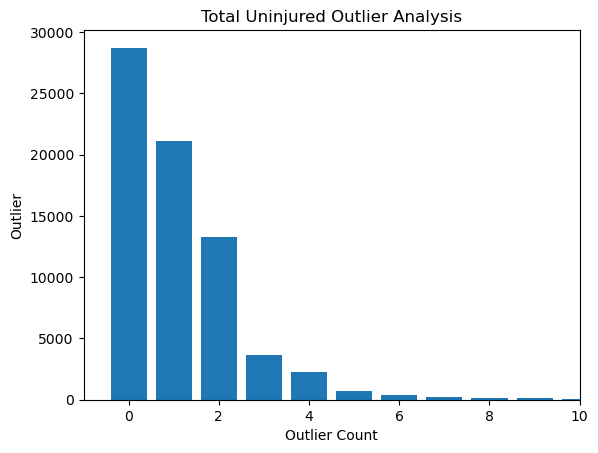

In [50]:
# Identify all outliers of Total.Uninjured
mask = ad_5['Total.Uninjured'].value_counts()

# Assign x, y
x = mask.index
y = mask.values

fig, ax = plt.subplots()

ax.bar(x,y)
plt.xlim(xmin=-1, xmax=10)
ax.set_title('Total Uninjured Outlier Analysis')
ax.set_xlabel('Outlier Count')
ax.set_ylabel('Outlier');

Looks like it makes sense to get rid of outliers with values >7 in `Total.Uninjured`.

In [42]:
# Eliminate outliers (>5) in Total.Uninjured

ad_6 = ad_5.copy()

mask_outliers = ad_6['Total.Uninjured'] < 8
ad_6 = ad_6[mask_outliers]

# New describe check
ad_6.describe()

,Unnamed: 0.1,Unnamed: 0,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Year
count,70373.000000,70373.000000,70373.000000,70373.000000,70373.000000,70373.000000,70373.000000,70373.000000
mean,36516.614952,41561.317281,1.108891,0.521123,0.227559,0.260327,1.071192,1998.055632
std,21320.637763,27168.173797,0.384144,4.257489,1.176828,0.769864,1.232974,12.653617
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1948.000000
25%,18070.000000,18302.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1987.000000
50%,36260.000000,36760.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1995.000000
75%,54643.000000,69553.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2011.000000
max,74498.000000,88888.000000,8.000000,295.000000,161.000000,62.000000,7.000000,2022.000000


#### Get Top 25 Used `Make`

To be able to analyze which `Make` makes sense to start with, we want to find the top 25 being used.

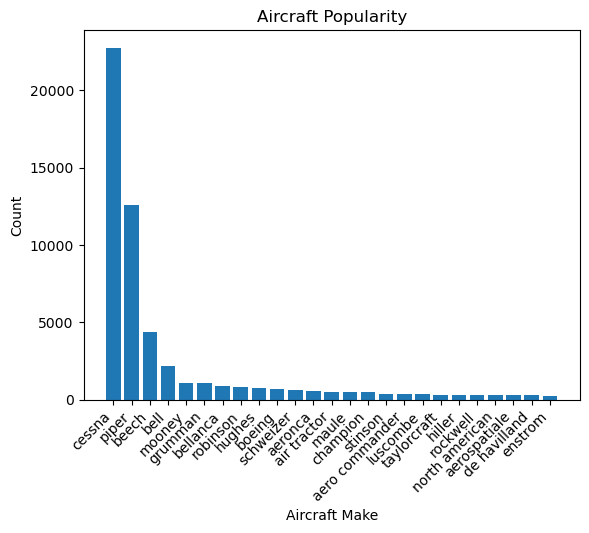

In [51]:
# Get the top 25 'Make' and see which aircrafts are most popular
top25_make_names = ad_6['Make'].value_counts().nlargest(25).index

# Filter the DataFrame to include only the top 25 'Make' values
top25_make_data = ad_6[ad_6['Make'].isin(top25_make_names)]

# Count occurrences of each 'Make'
make_counts = top25_make_data['Make'].value_counts()

#Plot
fig, ax = plt.subplots()

plt.bar(make_counts.index, make_counts.values)

plt.xlabel('Aircraft Make')
plt.ylabel('Count')
plt.title('Most Used Aircraft Make')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

<br> If we view this data numerically, we can see that ~43% of aircrafts being used are of Cessna make. This aligns with the information provided by CNN about best selling airplanes.

**Source:** <a href = "https://www.cnn.com/travel/article/world-best-selling-airplanes/index.html">Best Selling Airplain</a>

In [52]:
top25_make_data['Make'].value_counts(normalize=True)*100

cessna            42.970417
piper             23.778059
beech              8.233117
bell               4.053314
mooney             2.069135
grumman            1.976628
bellanca           1.699107
robinson           1.587721
hughes             1.434801
boeing             1.264891
schweizer          1.193151
aeronca            1.040231
air tractor        0.977930
maule              0.900527
champion           0.866545
stinson            0.711737
aero commander     0.672091
luscombe           0.653212
taylorcraft        0.613566
hiller             0.611679
rockwell           0.598463
north american     0.589024
aerospatiale       0.530499
de havilland       0.500293
enstrom            0.473862
Name: Make, dtype: float64

#### Top `Make` Compared with `Total.Uninjured` and `Aircraft.damage`

We can tell that Cessna is the most widely used make by far. We would also want to know if it causes the least injuries and aircraft damage. 

In addition, we can see that our decision regarding make comes down to the top 4 since beyond that, the count is pretty evenly disperced among the rest of the make types.


For `Total.Uninjured` vs `Make` analysis, it's hard to get any truly significant results since there are only max 7 uninjured passengers after removing outliers. Though, we can tell that Cessna has a leg up on the other top 4 makes. Regardless, we would want more data to confirm that make has the least risk associated with it.

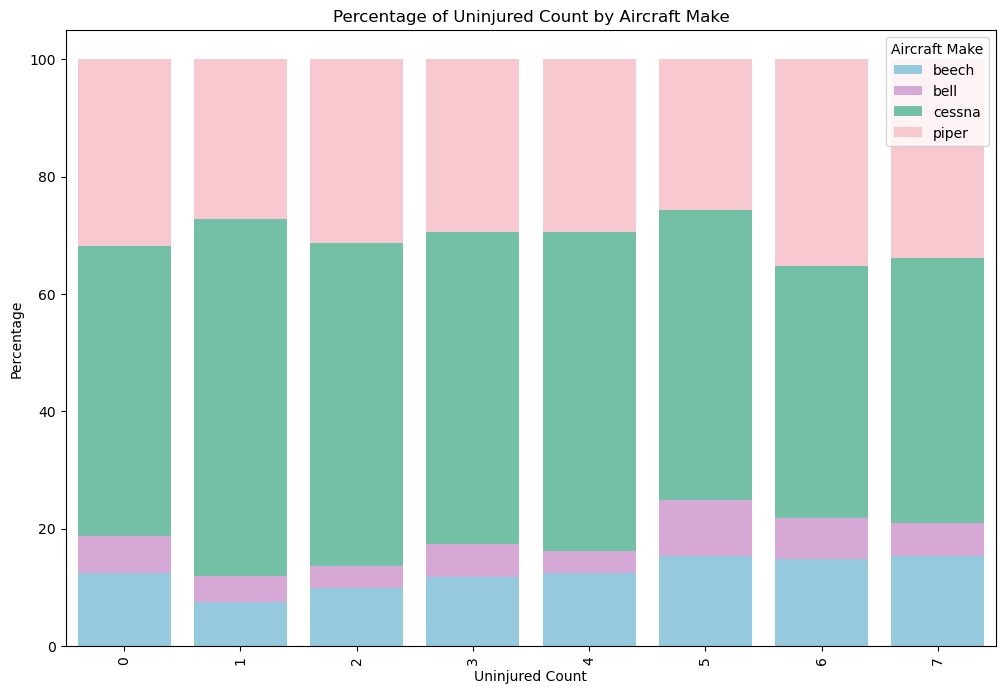

In [45]:
# Filter further to Top 4 Make 

# Use previous top25_make_data created
top4_make_names = top25_make_data['Make'].value_counts().nlargest(4).index

# Filter the DataFrame to include only the top 10 'Make' values
top4_make_data = top25_make_data[top25_make_data['Make'].isin(top4_make_names)]

# Calculate percentage values for each category per 'Make'
percentage_uninjured = top4_make_data.groupby(['Total.Uninjured', 'Make']).size().unstack().apply(lambda x: x / x.sum(), axis=1) * 100

# Stacks the DataFrame to create a Percentage column and restablishes 'Aircraft.damage'
# column to be used as 'hue'
stacked_percentage_uninjured = percentage_uninjured.stack().reset_index(name='Percentage')

# Create a bar plot with percentage values
plt.figure(figsize=(12, 8))

# Use hue parameter to stack 'destroyed', 'substantial', 'minor' categories
sns.barplot(x='Total.Uninjured', y='beech', data=percentage_uninjured.reset_index(), color='skyblue', label='beech')
sns.barplot(x='Total.Uninjured', y='bell', data=percentage_uninjured.reset_index(), color='plum', label='bell', 
            bottom=percentage_uninjured['beech'])
sns.barplot(x='Total.Uninjured', y='cessna', data=percentage_uninjured.reset_index(), color='mediumaquamarine', label='cessna', 
            bottom=percentage_uninjured['beech'] + percentage_uninjured['bell'])
sns.barplot(x='Total.Uninjured', y='piper', data=percentage_uninjured.reset_index(), color='pink', label='piper', 
            bottom=percentage_uninjured['beech'] + percentage_uninjured['bell'] + percentage_uninjured['cessna'])

# Add labels and title
plt.xlabel('Uninjured Count')
plt.ylabel('Percentage')
plt.title('Percentage of Uninjured Count by Aircraft Make')
plt.xticks(rotation=90)
plt.legend(title='Aircraft Make')

# Show the plot
plt.show();

<br> 

<br> When comparing `Make` with `Aircraft.damage` we can see that because Cessna is still by far the most popular, it also records the most substantial damage to the air craft. However, it does not *seem* have significanly more cases of destroyed aircrafts than lesser used makes.

Again, we see that beyond the top 4 makes, the analysis becomes insignificant.

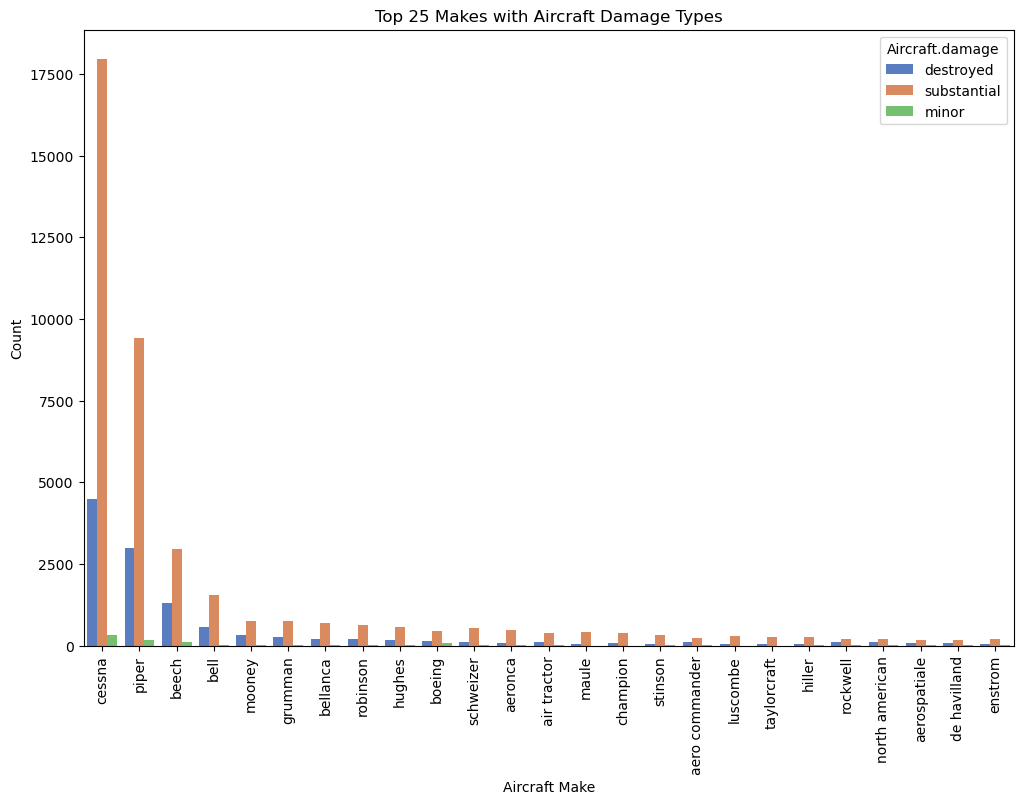

In [46]:
# Visualize top 25 'Make' with 'Aircraft.damage'

# Use previously established DataFrame
top25_make_data

# Get the order of 'Make' based on count in descending order
make_order = top25_make_data['Make'].value_counts().index

# Create a grouped bar chart comparing 'Make' and 'Aircraft.damage'
plt.figure(figsize=(12, 8))
sns.countplot(x='Make', hue='Aircraft.damage', data=top25_make_data, palette='muted', order=make_order)

# Add labels and title
plt.xlabel('Aircraft Make')
plt.ylabel('Count')
plt.title('Top 25 Makes with Aircraft Damage Types')
plt.xticks(rotation=90)

# Show the plot
plt.show()

<br> Finally we want to compare `Make` and `Aircraft.damage` on a percentage scale to be certain which make poses least risk to the aircraft during an accident.

We can see that though it looked like Piper might have a lesser percentage of destroyed aircrafts, in fact, it is Cessna that poses least risk.

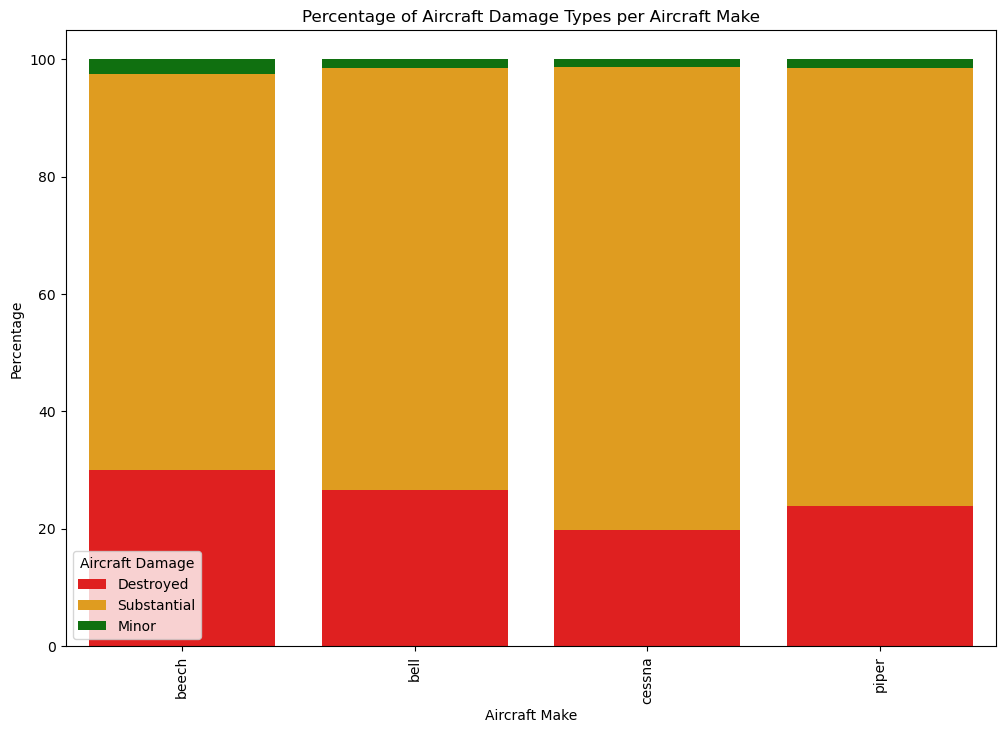

In [47]:
# We can use previously established DataFrame
top4_make_data

# Calculate percentage values for each category per 'Make'
percentage_damage = top4_make_data.groupby(['Make', 'Aircraft.damage']).size().unstack().apply(lambda x: x / x.sum(), axis=1) * 100

# Stacks the DataFrame to create a Percentage column and restablishes 'Aircraft.damage'
# column to be used as 'hue'
stacked_percentage_damage = percentage_damage.stack().reset_index(name='Percentage')

# Create a bar plot with percentage values
plt.figure(figsize=(12, 8))

# Use hue parameter to stack 'destroyed', 'substantial', 'minor' categories
sns.barplot(x='Make', y='destroyed', data=percentage_damage.reset_index(), color='red', label='Destroyed')
sns.barplot(x='Make', y='substantial', data=percentage_damage.reset_index(), color='orange', label='Substantial', bottom=percentage_damage['destroyed'])
sns.barplot(x='Make', y='minor', data=percentage_damage.reset_index(), color='green', label='Minor', bottom=percentage_damage['destroyed'] + percentage_damage['substantial'])

# Add labels and title
plt.xlabel('Aircraft Make')
plt.ylabel('Percentage')
plt.title('Percentage of Aircraft Damage Types per Aircraft Make')
plt.xticks(rotation=90)
plt.legend(title='Aircraft Damage')

# Show the plot
plt.show();

<br> If we look at the data numerically below, we can see that ~20% of Cessna accidents destroy the aircraft while Piper, the second most used make, has ~24% of accidents resulting in a destroyed aircraft.

In [48]:
# Table of percentages
top4_make_data.groupby(['Make', 'Aircraft.damage']).size().unstack().apply(lambda x: x / x.sum(), axis=1) * 100

Aircraft.damage,destroyed,minor,substantial
Make,,,
beech,29.947260,2.545288,67.507452
bell,26.641826,1.537028,71.821146
cessna,19.722332,1.388340,78.889328
piper,23.779277,1.397380,74.823343


#### `Model` vs `Aircraft.damage`

#### `Engine.Type` to `Injuries`

In [ ]:
# Creating personalized columns InjuriesSubset(Injuries sorted in descending order, 250 values) from filtered dataframe
#Creating corresponding column to find Aviation EngineType through InjuriesSubset_EngineType column

### redistribute engine type unknown first

InjuriesSubset = ad_6['Injuries'].sort_values(ascending=False).values[:250]
top250indices = filtered_df['Injuries'].sort_values(ascending=False).index[:250]
InjuriesSubset_EngineType = filtered_df.loc[top250indices, "Engine.Type"].values

fig, ax = plt.subplots(figsize = (12,8))

x = InjuriesSubset_EngineType
y = InjuriesSubset
sns.barplot(x = InjuriesSubset_EngineType, y= InjuriesSubset, data=AviationSubset_df)
ax.set_xlabel("Engine Type")
ax.set_ylabel("Fatal Injuries")
ax.set_title("Engine Type Versus Fatal/Serious Injuries")
plt.show()

### `Weather.Condition` & `Location` vs `Injury Severity`

In [ ]:
plt.figure(figsize=(10, 8))
sns.swarmplot(x='Location', y='Weather.Condition', hue='Injury.Severity', data=df_clean, palette='viridis', size=8)
plt.title('Accidents by Location, Weather Condition, and Injury Severity')
plt.xlabel('Location')
plt.ylabel('Weather Condition')
plt.legend(title='Injury Severity', bbox_to_anchor=(1.05, 1), loc='upper left')


## 4. Conclusion & Recommendations

**Aircraft Make**

